In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [61]:
# image dimension
img_width, img_height = 150, 150

train_data_dir = 'Datasets/catsvsdogs/train'
validation_data_dir = 'Datasets/catsvsdogs/validation'
test_data_dir = 'Datasets/catsvsdogs/test'

NB_TRAIN_SAMPLES = 6000
NB_VALIDATION_SAMPLES = 800
EPOCHS = 20
BATCH_SIZE = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [63]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [64]:
# augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# augmentation configuration for testing, only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [65]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


In [66]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = NB_TRAIN_SAMPLES // BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps = NB_VALIDATION_SAMPLES // BATCH_SIZE)

Epoch 1/20
375/375 [==============================] - 126s 337ms/step - loss: 0.6762 - acc: 0.5890 - val_loss: 0.5739 - val_acc: 0.7063
Epoch 2/20
375/375 [==============================] - 122s 324ms/step - loss: 0.5937 - acc: 0.6952 - val_loss: 0.5488 - val_acc: 0.7290
Epoch 3/20
375/375 [==============================] - 122s 326ms/step - loss: 0.5553 - acc: 0.7347 - val_loss: 0.5891 - val_acc: 0.7036
Epoch 4/20
375/375 [==============================] - 132s 351ms/step - loss: 0.5075 - acc: 0.7648 - val_loss: 0.5514 - val_acc: 0.7252
Epoch 5/20
375/375 [==============================] - 145s 386ms/step - loss: 0.4705 - acc: 0.7855 - val_loss: 0.4884 - val_acc: 0.7595
Epoch 6/20
375/375 [==============================] - 139s 372ms/step - loss: 0.4520 - acc: 0.7908 - val_loss: 1.1226 - val_acc: 0.6743
Epoch 7/20
375/375 [==============================] - 142s 379ms/step - loss: 0.4358 - acc: 0.8117 - val_loss: 0.5092 - val_acc: 0.7888
Epoch 8/20
375/375 [============================

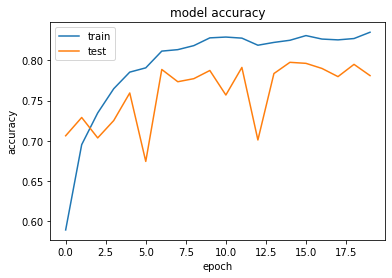

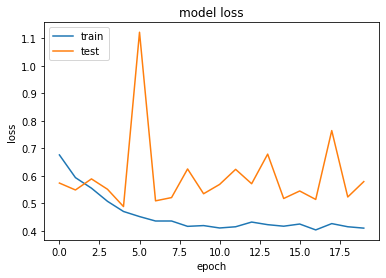

In [69]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

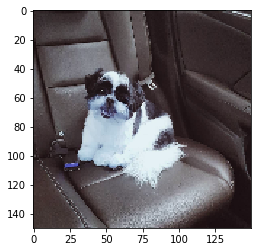

Its a Dog


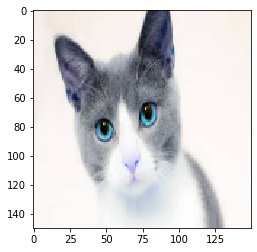

Its a Cat


In [72]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Datasets/catsvsdogs/nene.jpg')
img = cv2.resize(img,(150,150))

plt.imshow(img)
plt.show()

img = img.reshape(1,150,150,3)
value = model.predict(img)

if value == 1:
    print ("Its a Dog")
else:
    print("Its a Cat")
    
img2 = cv2.imread('Datasets/catsvsdogs/betty.jpg')
img2 = cv2.resize(img2,(150,150))

plt.imshow(img2)
plt.show()

img2 = img2.reshape(1,150,150,3)
value = model.predict(img2)

if value == 1:
    print ("Its a Dog")
else:
    print("Its a Cat")